<a href="https://colab.research.google.com/github/sayan0506/Dimensionality-Reduction-Using-Autoencoder/blob/master/Dimensionality_Reduction_Using_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dimensionality Reduction Using Autoencoder

# Importing python modules

In [1]:
import matplotlib

# This magic just sets up matplotlib's interactive mode
%matplotlib inline
# Decide the default image format for inline figures: SVG or PNG 
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

# ggplot is a plotting system for Python based on R's ggplot2 and the Grammar of Graphics. 
# It is built for making profressional looking, plots quickly with minimal code.
plt.style.use('ggplot')

Declaring colors for visualization

In [2]:
# Colors for visualization of features

cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

# Dataset Creation and Preprocessing techniques

Creating the Make_blobs dataset, where,

1. No. of features = 50
2. No. of samples = 20000
3. No. of clusters = 20
4. For each of 20 clusters, the standard deviation is retricted to 0.2
5. Center_box is the bounding box of each cluster, when centers are generated at random
6. Random state = 17

In [3]:
x, y = make_blobs(n_features=50, n_samples=20000, centers=20, cluster_std=0.2,
                  center_box =[-1,1], random_state=17 )

In [4]:
print('Input size: {0}  Output shape: {1}\n'.format(x.shape, y.shape))
print('Datapoint sample: \n\nInput: {0}\n\nCluster: {1}'.format(x[0],y[0]))

Input size: (20000, 50)  Output shape: (20000,)

Datapoint sample: 

Input: [-0.24491985  0.08099673 -0.36631058 -0.30356551  0.4029225   0.65687067
  0.92734294  0.15492068 -1.10501981  1.2015462   0.09578114 -0.75648951
 -0.03483697 -0.59523737  0.02576486  0.53523807  0.08089194 -0.26480015
 -0.71277422  0.07793643  0.10326661 -0.92311803 -0.18569531 -0.5761846
 -0.78765359 -0.83055169  0.04446853 -0.26118528  0.8337965  -0.59227263
  0.68834042  0.17701281  0.2732509  -0.00538731  0.92922794  0.62743183
  0.85424358  0.80721711 -1.14219787  0.28178435  0.55215801  0.38500603
  0.19163107  0.55960783  0.72073584 -1.14520866  1.09184982 -1.04337987
  1.24350139 -0.63786661]

Cluster: 16


Splitting the dataset into training and testing set with split ratio = 9:1

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 17)

In [6]:
print('Train shape: {0} {1}\n Test shape: {2} {3}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Train shape: (18000, 50) (18000,)
 Test shape: (2000, 50) (2000,)


Data pre-processing, rescaing the data using Min_Max scaler.

**Formula:**

* X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))  
* X_scaled = X_std * (max - min) + min  
where **min, max = feature_range**, which was passed a center_box while creating the dataset.

So, features will be bounded within -1 to 1 range.

In [7]:
# min_max_scaler object
scaler = MinMaxScaler()

# transforming the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [8]:
print('Sample datapoint after rescaling: \n',x_train[0])

Sample datapoint after rescaling: 
 [0.13481675 0.28555197 0.44805107 0.64627624 0.59576131 0.48453458
 0.35059505 0.64726088 0.18687352 0.16567256 0.41880301 0.78504359
 0.2178695  0.7704359  0.49939758 0.69256836 0.09822267 0.42050622
 0.53019966 0.21021951 0.26001669 0.52950709 0.50491926 0.47478711
 0.55185784 0.76213604 0.46346446 0.56059949 0.23141354 0.61885778
 0.55893187 0.25823475 0.40697372 0.23901437 0.18117552 0.31043247
 0.64426644 0.18418674 0.75877341 0.71428316 0.556052   0.65526293
 0.49180608 0.23385424 0.74938107 0.26519229 0.26048168 0.25948805
 0.32347424 0.30981277]


# Baseline model using PCA

* The SVD Solver block solves the linear system AX=B, which can be overdetermined, underdetermined, or exactly determined.
* The SVD solver is used to find the Principle components for the individual datapoints.
* From 50 different features dimensionality of data is reduced to 2 principal components.


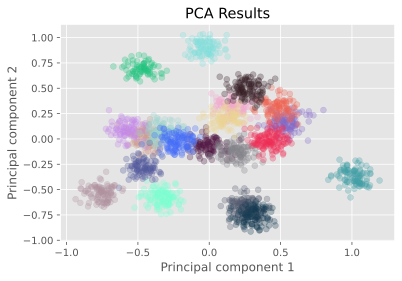

In [9]:
# Declaring PCA object, where number of principal components are passed to be resulted as output after transform
pca = PCA(n_components=2)

# fit the train data to PCA
pca.fit(x_train)

# implementing PCA_transform 
res_pca = pca.transform(x_test)

# obtaining number of unique labels or clusters
unique_labels = np.unique(y_test)

# plotting the result of PCA implementaion 
for index, unique_label in enumerate(unique_labels):
  # fetching PCA results of the datapoints which correspond to unique_label cluster 
  x_data = res_pca[y_test==unique_label]
  # x_data[:,0]=> PC1, x_data[:,1]=> PC2
  plt.scatter(x_data[:,0], x_data[:,1],alpha = 0.3, c = cols[index])

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA Results')
plt.show()

# Autoencoder Implementation

Autoencoder network is implemented using **MLPRegressor** of Sklearn.

**Network architecture:**

Encoder Network

50 => 100 => 50 => 2(Latent space)

Decoder Network

50 => 100 => 50(Reconstructed output)

**Autoencoder network = Encoder + Decoder**

**Note:** Throuout the network default **activation = ReLU(Rectifier Linear Unit)**



In [10]:
# for the autoencoder network, learning_rate(alpha)=1e-15
# max_iter = 20000(epochs)
autoencoder = MLPRegressor(alpha = 1e-15, hidden_layer_sizes=(50,100,50,2,50,100,50),
                           max_iter = 20000, random_state = 1)

# as autoencoder is tuned in such a way so that it can reconstrcut itself for obtaining an efficient latent space
autoencoder.fit(x_train, x_train)

MLPRegressor(activation='relu', alpha=1e-15, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=20000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
             solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# Reducing Dimensionality with Encoder network

In [11]:
# fetching tuned weights of the Autoencoder network
w = autoencoder.coefs_
# fetching tuned biases of the Autoencoder network
b = autoencoder.intercepts_

In [12]:
# fetching tuned encoder parameters
encoder_weights = w[0:4]
encoder_biases = b[0:4]

In [22]:
def encoder(encoder_weights, encoder_biases, data):
  # initialized result of encoder variable as input
  res_en = data
  # encoder and decoder weight matrix are zipped here
  for index, (w,b) in enumerate(zip(encoder_weights, encoder_biases)):
    # output of encoder here is the inputs to the latent spaces, not the activation from bottleneck layer
    if index + 1 == len(encoder_weights):
      # res_en@w does the dot operation similar to np.dot
      res_en = res_en@w + b
    else:
      res_en = np.maximum(0, (res_en@w + b))
  return res_en

# calculating encoder output for test data
res_en = encoder(encoder_weights, encoder_biases, x_test)

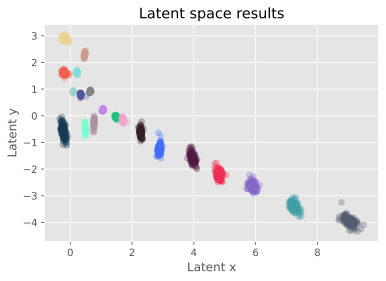

In [25]:
unique_labels = np.unique(y_test)

# plotting the result of Autoencoder implementaion 
for index, unique_label in enumerate(unique_labels):
  # fetching PCA results of the datapoints which correspond to unique_label cluster 
  latent_space = res_en[y_test==unique_label]
  # x_data[:,0]=> PC1, x_data[:,1]=> PC2
  plt.scatter(latent_space[:,0], latent_space[:,1],alpha = 0.3, c = cols[index])

plt.xlabel('Latent x')
plt.ylabel('Latent y')
plt.title('Latent space results')
plt.show()

# Performance checking of PCA and Autoencoder based dimenionality reduction techniques.

* For performance checking **Silhouette score** is used correspond to sklearn metrics.

* Compute the mean Silhouette Coefficient of all samples.

* The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [30]:
print('Score for PCA: ',silhouette_score(res_pca, y_test))

Score for PCA:  0.36441831320046747


In [28]:
print('Score for Autoencoder: ',silhouette_score(res_en, y_test))

Score for Autoencoder:  0.8020960810506663


# Conclusion

From both graphical representation and Silhoutte score it can be concluded that, Autoencoder based dimensionality reduction is much more efficient than PCA, as autoencoder gives better clustering result, and decision boundaries are explicit.